# La suite logistique

In [1]:
# --> Charge les packages Python nécessaires pour faire les figures.
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, TransformedBbox, BboxPatch, BboxConnector 

def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

# --> Charge les packages Python utiles pour le calcul numérique.
import numpy as np

# -->
from tqdm import tqdm

In [2]:
# --> Définition de la suite logistique.
def logistic_map(μ, x):
    return μ*x*(1-x)

In [3]:
def simulation(μ, x0=0.5, niter=1000, ntr=1000):
    # --> Initialise le tableau dans lequel on stockera x[i].
    x = np.zeros(niter+ntr) ; x[0] = x0
    
    # --> Itère le système dynamique.
    for i in range(1, niter+ntr):
        x[i] = logistic_map(μ, x[i-1])
        
    # --> Enlève le régime transitoire.
    x = x[ntr:]
    
    return x

In [4]:
def orbit_diagram(μmin, μmax, Δμ, **kwargs):
    # --> Valeurs prises par le paramètre de contrôle μ.
    npts = np.rint((μmax-μmin)/Δμ).astype(int) + 1
    μ_range = np.linspace(μmin, μmax, npts)
    
    # --> Itère sur les différntes valeurs de μ.
    X = []
    for μ in tqdm(μ_range):
        X.append(simulation(μ, **kwargs))
        
    return μ_range, X

In [5]:
def plot_orbit_diagram(μ_range, X, ax, **kwargs):
    for i, μ in enumerate(μ_range):
        ax.scatter(
            μ*np.ones_like(X[i]), X[i],
            **kwargs,
        )

In [17]:
#############################################################
#####                                                   #####
#####     CALCUL DU DIAGRAMME DE BIFURCATION GLOBAL     #####
#####                                                   #####
#############################################################

# --> Valeurs min et max du paramètre de contrôle.
μmin, μmax = 1, 4
# --> Echantillonage.
Δμ = 0.001
# --> Simulate l'ensemble.
μ_range_0, X0 = orbit_diagram(μmin, μmax, Δμ)

100%|█████████████████████████████████████| 3001/3001 [00:01<00:00, 2355.53it/s]


In [18]:
#############################################################
#####                                                   #####
#####     CALCUL DU DIAGRAMME DE BIFURCATION ZOOM NIVEAU 1     #####
#####                                                   #####
#############################################################

# --> Valeurs min et max du paramètre de contrôle.
μmin, μmax = 3, 1 + 2*np.sqrt(2)
α = (μ_range_0.max() - μ_range_0.min()) / (μmax - μmin)
# --> Echantillonage.
Δμ = Δμ/α
# --> Simulate l'ensemble.
μ_range_1, X1 = orbit_diagram(μmin, μmax, Δμ)

100%|█████████████████████████████████████| 3001/3001 [00:01<00:00, 2351.85it/s]


In [19]:
#############################################################
#####                                                   #####
#####     CALCUL DU DIAGRAMME DE BIFURCATION ZOOM NIVEAU 1     #####
#####                                                   #####
#############################################################

# --> Valeurs min et max du paramètre de contrôle.
μmin, μmax = 1 + np.sqrt(6), 3.6782535764549245
# --> Echantillonage.
Δμ = Δμ/α
# --> Simulate l'ensemble.
μ_range_2, X2 = orbit_diagram(μmin, μmax, Δμ, **{"niter": 4000, "ntr": 4000})

100%|██████████████████████████████████████| 3001/3001 [00:05<00:00, 586.91it/s]


In [20]:
#############################################################
#####                                                   #####
#####     CALCUL DU DIAGRAMME DE BIFURCATION ZOOM NIVEAU 1     #####
#####                                                   #####
#############################################################

# --> Valeurs min et max du paramètre de contrôle.
μmin, μmax = 3.54409, 3.607261388324867
# --> Echantillonage.
Δμ = Δμ/α
# --> Simulate l'ensemble.
μ_range_3, X3 = orbit_diagram(μmin, μmax, Δμ, **{"niter": 4000, "ntr": 4000})

100%|██████████████████████████████████████| 3001/3001 [00:05<00:00, 598.30it/s]


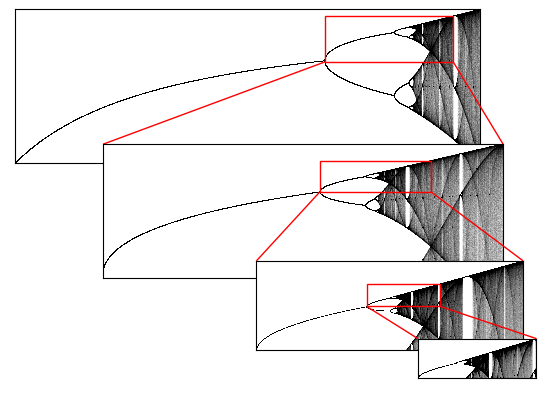

In [21]:
FIG_WIDTH, FIG_HEIGHT = 6, 2

fig, ax = plt.subplots(1, 1, figsize=(FIG_WIDTH, FIG_HEIGHT))

#####
#####
#####

# --> Optional arguments.
kwargs = {
    "marker": ",",
    "s": 0.5,
    "color": "black",
    "edgecolor": "none",
    "alpha": 0.02,
}

# --> Trace le diagramme d'orbite.
plot_orbit_diagram(μ_range_0, X0, ax, **kwargs)

# --> Mise en page de la figure.
ax.set_xlim(1, 4)
#ax.set_xlabel("μ")
ax.xaxis.set_label_coords(0.25, -0.1)
ax.set_xticks([])
ax.set_ylim(0, 1)
#ax.set_ylabel("x")
ax.set_yticks([])

#####
#####
#####

# -->
ax1 = inset_axes(
    ax, 
    width=(2/3)*FIG_WIDTH, 
    height=(2/3)*FIG_HEIGHT,
    bbox_transform=ax.transAxes,
    loc="upper right",
    bbox_to_anchor=(1.05, 0.125),
    borderpad=0
)

# --> Trace le diagramme d'orbite.
plot_orbit_diagram(μ_range_1, X1, ax1, **kwargs)

# --> Mise en page de la figure.
ax1.set_xlim(μ_range_1[0], μ_range_1[-1])
ax1.set_xticks([])
ax1.set_ylim(X1[0].min(), X1[-1].max())
ax1.set_yticks([])

#####
#####
#####

# -->
ax2 = inset_axes(
    ax1, 
    width=(2/3)**2*FIG_WIDTH, 
    height=(2/3)**2*FIG_HEIGHT,
    bbox_transform=ax1.transAxes,
    loc="upper right",
    bbox_to_anchor=(1.05, 0.125),
    borderpad=0
)

# --> Trace le diagramme d'orbite.
kwargs["alpha"] = 0.01
kwargs["s"] = 0.25
plot_orbit_diagram(μ_range_2, X2, ax2, **kwargs)

# --> Mise en page de la figure.
ax2.set_xlim(μ_range_2[0], μ_range_2[-1])
ax2.set_xticks([])
ax2.set_ylim(X2[0].max(), X2[-1].max())
ax2.set_yticks([])

#####
#####
#####

# -->
ax3 = inset_axes(
    ax2, 
    width=(2/3)**4*FIG_WIDTH, 
    height=(2/3)**4*FIG_HEIGHT,
    bbox_transform=ax2.transAxes,
    loc="upper right",
    bbox_to_anchor=(1.05, 0.125),
    borderpad=0
)

# --> Trace le diagramme d'orbite.
kwargs["alpha"] = 0.005
kwargs["s"] = 0.25
plot_orbit_diagram(μ_range_3, X3, ax3, **kwargs)

# --> Mise en page de la figure.
ax3.set_xlim(μ_range_3[0], μ_range_3[-1])
ax3.set_xticks([])
ax3.set_ylim(X3[0].max(), X3[-1].max())
ax3.set_yticks([])

mark_inset(ax, ax1, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="red") 
mark_inset(ax1, ax2, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="red") 
mark_inset(ax2, ax3, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="red") 

plt.savefig("logistic_map_orbit_diagram.png", bbox_inches="tight", dpi=1200)